<a href="https://colab.research.google.com/github/Leonjjmilner/Utility-bills/blob/main/Utility_Bills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-5-24641143a51b>:24: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


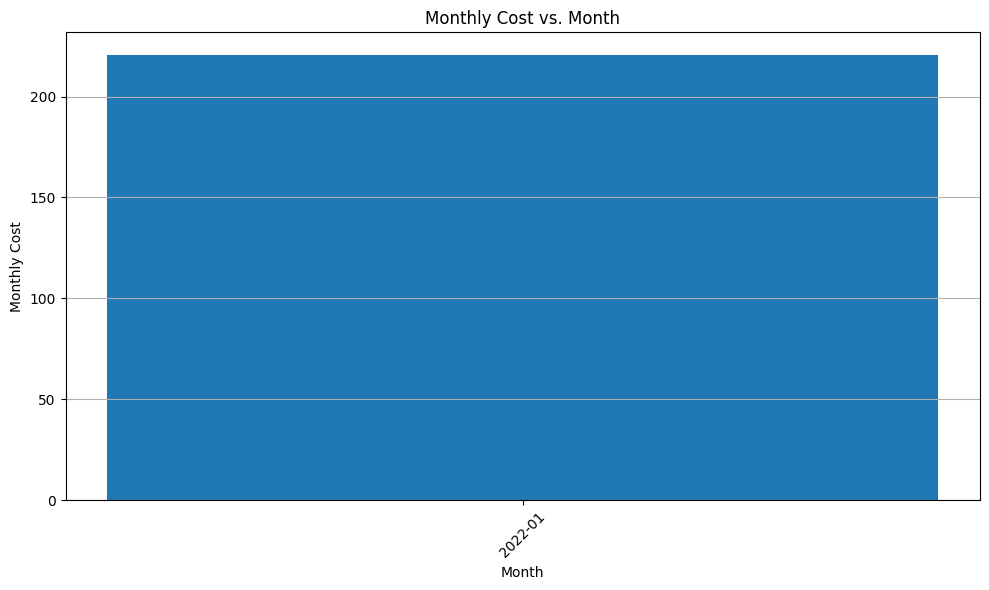

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Read the CSV data and preprocess it
# Replace 'your_csv_file.csv' with the actual path to your CSV file on Google Drive
df = pd.read_csv('/content/drive/MyDrive/House/841 Bigelow Crescent/Bills/Utility Bills - Electricity.csv')
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').dt.strftime('%Y-%m')
monthly_costs = df.groupby('Month')['Cost'].sum().reset_index()

# Create a function to update the plot for each animation frame
def update(frame):
    plt.cla()  # Clear previous plot

    # Plot data up to the current frame
    plt.bar(monthly_costs['Month'][:frame + 1], monthly_costs['Cost'][:frame + 1])
    plt.xlabel('Month')
    plt.ylabel('Monthly Cost')
    plt.title('Monthly Cost vs. Month')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Create the animation
fig = plt.figure(figsize=(10, 6))
animation = FuncAnimation(fig, update, frames=len(monthly_costs), repeat=False)

# Display the animation
HTML(animation.to_jshtml())
